# Проект по анализу данных


### О задании
В рамках курса "Интеллектуальный анализ данных" помимо выполнения контрольных и практических заданий вам также нужно выполнить проект. За каждый модуль ставится отдельная оценка. В этом модуле вам предстоит познакомиться с данными, сделать их описание, поискать закономерности. В следующем модуле вы продолжите работу с этими данными, но уже будете строить непосредственные модели, работающие с ними. 



# Общий план проекта
## Часть 1

* Описание набора данных и признаков с визуализацией - 0.5 балла
* Постановка задачи. Что предсказываем? Зачем? - 0.5 балла
* Первичный анализ признаков. Типы шкал. Пропуски значений  - 0.5 балла
* Первичный визуальный анализ признаков  - 1 балл
* Если пришли к каким-то "инсайтам", обнаружили закономерности - изложите - 0.5 балла
* Описание предобработки данных (замена пропусков, шкалирование и изменение признаков и т.д.)  - 1 балла

## Часть 2

* Если создаются признаки, то описание этого процесса  - 1 балл
* Описание процесса отбора признаков  - 0.5 балла
* Обоснование выбора модели(-ей)  - 0.5 балла
* Выбор меры качества. Кросс-валидация. Оценка гипер-параметров   - 1 балл
* Построение кривых валидации и обучения - 1.5 балла
* Оценка модели(-ей) с описанием выбранной меры качества (+ объяснение)  - 1 балла
* Выводы - 0.5 балла

In [1]:
import pandas as pd
import numpy as np

import scipy.optimize as opt
import sympy
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.mlab as mlab
import seaborn as sns

sns.set(style = 'whitegrid')

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

from IPython.core.display import display


*Проект *
============

**Выполнили:**

*Купцова Анастасия*

*Уманец Екатерина*

*Демьяненко Елизавета*


**Постановка задачи**
-------------------

**Цель проекта**: 
* посмотреть взаимосвязь основных характеристик квартиры с ее ценой
* посторить предсказание стоимости аренды квартиры по ее характеристикам

**Зачем**: актуальная тема для людей, которые хотят сдать квартиру в Москве и должны назначить такую цену, которая бы максимизировала их доход и не отпугивала клиентов.

**Гипотезы**
-------------------

* Цена квартиры и время, за которое нужно добираться до центра, отрицательно коррелированы

* Цена квартиры и расстояние до метро отрицательно коррелированы

* Цена и площадь квартиры положительно коррелированы

* Цена квартиры и тип ремонта положительно коррелированы(чем лучше тип ремонта, тем больше цена)

* Цена квартиры завсисит от района, в котором расположена квартира


**Часть 1**
-----------

**Описание набора данных и источников**


Используемые в проекте данные находятся в следующих файлах:

1)X.txt   
Набор данных представляет собой различные характеристики квартир, сдающихся в аренду в Москве в апреле 2016 года. 
Данные получены с сайта http://www.cian.ru/.

2)y.csv  
Набор данных определяет цену арнеды для каждой квартиры из файла X.txt.
Данные получены с сайта http://www.cian.ru/. 

3)station.txt  
Файл содержащий информацию о времени, которое нужно потратить, чтобы добраться до центра(до ст. метро Библиотека им. Ленина) от различных станций метро. 
Данные получены с помощью сервиса "Яндекс Метро"(https://metro.yandex.ru/moscow).

**Предобработка данных**
-------------------

In [2]:
#Считываем данные
df_X=pd.read_csv('X.txt', sep=',')
df_Y=pd.read_csv('y.csv', sep=',')
df_Y.columns=[['№','price']]

#проверим, совпадает ли объем данных в обоих файлах
if len(df_X) == len(df_Y):
    print("data have the same length = " + str(len(df_X)))


data have the same length = 10442


df_X - таблица с описанием квартир по различным признакам

df_Y - стоимость квартир, соответсвующих описанию из таблицы df_X


In [3]:
#продемострируем,какие данные находятся в исходных таблицах
display(df_X.head())
display(df_Y.head())

,﻿,S,where,floor,max_floors,rooms_number,condition,bath,shower,balcony,...,washer,dishwasher,internet,phone,tv,animals,children,furniture,kitchen_furniture,fridge
0,0,56.0,Арбат,17.0,24.0,2.0,дизайнерский,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1,41.0,Очаково-Матвеевское,16.0,24.0,1.0,евроремонт,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,2,140.0,Дорогомилово,4.0,11.0,4.0,дизайнерский,1.0,1.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,3,47.0,Киевский,4.0,5.0,2.0,косметический,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,4,40.0,Раменки,12.0,17.0,1.0,косметический,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


,№,price
0,0,99000
1,1,40000
2,2,350000
3,3,15000
4,4,16000


In [4]:
#совместим таблицы
df_Y = df_Y['price']
df_united = pd.concat([df_X,df_Y],axis=1)

In [5]:
#обработаем совмещенную таблицу, которая содержит и описание квартир, и цену аренды

In [6]:
#выведем название колонок
print(df_united.columns)
#продемонтсрируем данные, которые находятся в совмещенной таблице
display(df_united.head())

Index(['﻿', 'S', 'where', 'floor', 'max_floors', 'rooms_number', 'condition',
       'bath', 'shower', 'balcony', 'distance_to_subway', 'subway_station',
       'washer', 'dishwasher', 'internet', 'phone', 'tv', 'animals',
       'children', 'furniture', 'kitchen_furniture', 'fridge', 'price'],
      dtype='object')


,﻿,S,where,floor,max_floors,rooms_number,condition,bath,shower,balcony,...,dishwasher,internet,phone,tv,animals,children,furniture,kitchen_furniture,fridge,price
0,0,56.0,Арбат,17.0,24.0,2.0,дизайнерский,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,99000
1,1,41.0,Очаково-Матвеевское,16.0,24.0,1.0,евроремонт,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,40000
2,2,140.0,Дорогомилово,4.0,11.0,4.0,дизайнерский,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,350000
3,3,47.0,Киевский,4.0,5.0,2.0,косметический,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,15000
4,4,40.0,Раменки,12.0,17.0,1.0,косметический,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,16000


In [7]:
#переименуем столбцы в таблице
df_united.columns=['№','square', 'district', 'floor', 'max_floors', 'rooms_number', 'condition',
       'bath', 'shower', 'balcony', 'distance_to_metro', 'metro_station',
       'washer', 'dishwasher', 'internet', 'phone', 'TV', 'pets',
       'children', 'furniture', 'kitchen_furniture', 'fridge',
       'price']


In [8]:
#посмотрим на таблицу в текущем состоянии
display(df_united.head(20))

,№,square,district,floor,max_floors,rooms_number,condition,bath,shower,balcony,...,dishwasher,internet,phone,TV,pets,children,furniture,kitchen_furniture,fridge,price
0,0,56.0,Арбат,17.0,24.0,2.0,дизайнерский,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,99000
1,1,41.0,Очаково-Матвеевское,16.0,24.0,1.0,евроремонт,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,40000
2,2,140.0,Дорогомилово,4.0,11.0,4.0,дизайнерский,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,350000
3,3,47.0,Киевский,4.0,5.0,2.0,косметический,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,15000
4,4,40.0,Раменки,12.0,17.0,1.0,косметический,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,16000
5,5,45.0,Рязановское,2.0,5.0,1.0,косметический,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,17000
6,6,25.0,Новокосино,1.0,3.0,1.0,евроремонт,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18000
7,7,30.0,Головинский,1.0,5.0,1.0,косметический,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,18000
8,8,40.0,Некрасовка,6.0,17.0,1.0,косметический,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,19000
9,"9,""38,6"",,6,17,1,косметический,1.0,0.0,1.0,,,0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19000


In [9]:
#заметим, что в таблице встречается 2 бага: CTYPE в столбце district и Nan в таблице; избавимся от них
df_united['district'] = df_united['district'].replace(['CTYPE'],[None])
df_united = df_united.dropna()
print('data size without Nan and other bugs = ' + str(df_united.shape[0]))
display(df_united.head(20))

data size without Nan and other bugs = 8749


,№,square,district,floor,max_floors,rooms_number,condition,bath,shower,balcony,...,dishwasher,internet,phone,TV,pets,children,furniture,kitchen_furniture,fridge,price
0,0,56.0,Арбат,17.0,24.0,2.0,дизайнерский,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,99000
1,1,41.0,Очаково-Матвеевское,16.0,24.0,1.0,евроремонт,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,40000
2,2,140.0,Дорогомилово,4.0,11.0,4.0,дизайнерский,1.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,350000
4,4,40.0,Раменки,12.0,17.0,1.0,косметический,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,16000
6,6,25.0,Новокосино,1.0,3.0,1.0,евроремонт,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,18000
7,7,30.0,Головинский,1.0,5.0,1.0,косметический,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,18000
8,8,40.0,Некрасовка,6.0,17.0,1.0,косметический,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,19000
10,10,31.0,Бутырский,5.0,5.0,1.0,косметический,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,20000
11,11,47.0,Рязановское,2.0,5.0,2.0,косметический,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,20000
12,12,34.0,Некрасовка,6.0,17.0,1.0,косметический,1.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,20000


In [10]:
#посмотрим, есть ли в таблице повторения, если есть, то избавимся от них
#отсортируем цены по возрастанию

df_united=df_united.groupby(['price','district','metro_station', 'distance_to_metro','square', 
                  'floor', 'max_floors', 'rooms_number', 'condition','bath', 'shower', 'washer', 'dishwasher',
                    'internet','phone', 'TV', 'pets','children', 'furniture', 'balcony', 'kitchen_furniture', 
                    'fridge']).size().reset_index(name='число повторений').drop('число повторений',axis=1)
print('data size without reiterations = ' + str(df_united.shape[0]))
display(df_united)

data size without reiterations = 1424


,price,district,metro_station,distance_to_metro,square,floor,max_floors,rooms_number,condition,bath,...,dishwasher,internet,phone,TV,pets,children,furniture,balcony,kitchen_furniture,fridge
0,16000,Раменки,Киевская,5.000000,40.0,12.0,17.0,1.0,косметический,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,18000,Головинский,Речной вокзал,1.250000,30.0,1.0,5.0,1.0,косметический,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,18000,Новокосино,Новокосино,1.250000,25.0,1.0,3.0,1.0,евроремонт,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,19000,Некрасовка,Выхино,8.000000,40.0,6.0,17.0,1.0,косметический,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
4,20000,Бутырский,Тимирязевская,0.583333,31.0,5.0,5.0,1.0,косметический,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
5,20000,Гольяново,Щелковская,2.083333,30.0,8.0,9.0,1.0,косметический,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
6,20000,Десёновское,Теплый Стан,20.000000,40.0,9.0,17.0,1.0,косметический,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,20000,Ивановское,Новогиреево,1.250000,44.0,5.0,9.0,2.0,косметический,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
8,20000,Метрогородок,Бульвар Рокоссовского,2.000000,32.0,1.0,5.0,1.0,косметический,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
9,20000,Некрасовка,Выхино,5.000000,34.0,6.0,17.0,1.0,косметический,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [11]:
#добавим в таблицу время, которое нужно потратить, чтобы добраться до центра на метро

In [12]:
station = pd.read_csv('station.txt', sep='\t')#считываем таблицу содержащую время
station=station.rename(columns = {'\ufeffАвиамоторная':'Авиамоторная'})
df_united['time_to_centre'] = 0
i=0
#ставим в соответствие каждой квартире время(в минутах) до центра
for row in df_united.iterrows():   
    m=row[1]['metro_station']
    df_united.loc[i,'time_to_centre']=station[m][0]
    i=i+1

In [13]:
#удалим столбец metro_station, так как он нам был нужен только для того, чтобы выяснить time_to_centre
#более того это "неудобный" в обращении категориальный признак,
#который имеем свзяь с численным признаком - time_to_centrе и другим категориальным - district
df_united.drop('metro_station', axis=1, inplace=True)

In [14]:
#проверим, как расположены столбцы в таблице
df_united.columns

Index(['price', 'district', 'distance_to_metro', 'square', 'floor',
       'max_floors', 'rooms_number', 'condition', 'bath', 'shower', 'washer',
       'dishwasher', 'internet', 'phone', 'TV', 'pets', 'children',
       'furniture', 'balcony', 'kitchen_furniture', 'fridge',
       'time_to_centre'],
      dtype='object')

In [15]:
#расположим столбцы в более логичном порядке и получим итоговую таблицу с данными(data)
data = df_united[['price','district', 'time_to_centre', 'distance_to_metro','square', 
                  'floor', 'max_floors', 'rooms_number', 'condition',
                'bath', 'shower', 'washer', 'dishwasher', 'internet', 'phone', 'TV', 'pets',
               'children', 'furniture', 'balcony', 'kitchen_furniture', 'fridge']]

In [16]:
#итоговая таблица
display(data)

,price,district,time_to_centre,distance_to_metro,square,floor,max_floors,rooms_number,condition,bath,...,dishwasher,internet,phone,TV,pets,children,furniture,balcony,kitchen_furniture,fridge
0,16000,Раменки,8,5.000000,40.0,12.0,17.0,1.0,косметический,1.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0
1,18000,Головинский,29,1.250000,30.0,1.0,5.0,1.0,косметический,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,18000,Новокосино,32,1.250000,25.0,1.0,3.0,1.0,евроремонт,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,19000,Некрасовка,29,8.000000,40.0,6.0,17.0,1.0,косметический,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
4,20000,Бутырский,18,0.583333,31.0,5.0,5.0,1.0,косметический,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
5,20000,Гольяново,28,2.083333,30.0,8.0,9.0,1.0,косметический,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
6,20000,Десёновское,38,20.000000,40.0,9.0,17.0,1.0,косметический,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
7,20000,Ивановское,28,1.250000,44.0,5.0,9.0,2.0,косметический,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
8,20000,Метрогородок,22,2.000000,32.0,1.0,5.0,1.0,косметический,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
9,20000,Некрасовка,29,5.000000,34.0,6.0,17.0,1.0,косметический,1.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


**Описание предобработки данных**

Исходные данные были представлены в виде двух таблиц, содержащих информацию о квартирах, и файла, содержащего информацию о времени, котрое нужно потратить, чтобы добраться от различных станций метро до центра(ст. метро Библиотека им. Ленина).
Таблицы содержали информацию о 10442 объектах.
В ходе обработки данных, мы соединили две исходные таблицы в одну и добавили информацию о времени до центра.Также мы убрали пропуски и повторяющиеся объекты.

Обработанная таблица(1424 строки, 22 столбца) содержит 1424 оригинальных объекта, каждый из которых описывается 22 признаками.

**Список признаков, по которым различаются квартиры:**

price: цена(в рублях)за аренду квартиры в месяц (вещественный признак)

district: название района (категориальный признак)

time_to_centre: время(в минутах) от стации метро(ближайшей к квартире) до центра (вещественный признак)

distance_to_metro: расстояние(в километрах) от квартиры до метро (вещественный признак)

square: площадь(в квадратных метрах) квартиры (вещественный признак)

floor: этаж (вещественный признак)

max_floors: максимальное число этажей в доме (вещественный признак)

rooms_number: число комнат (вещественный признак)

condition: тип ремонта (категориальный признак; множество принимаемых значений: {'дизайнерский', 
'евроремонт', 'косметический'})

bath: наличие ванны (бинарный признак; "1" - (есть),"0" - (нет))

shower: наличие душа (бинарный признак; "1" - (есть),"0" - (нет))

washer: наличие стиральной машаны (бинарный признак; "1" - (есть),"0" - (нет))

dishwasher: наличие посудомоечной машины (бинарный признак; "1" - (есть),"0" - (нет))

internet: наличие интернета (бинарный признак; "1" - (есть),"0" - (нет))

phone: наличие телефона (бинарный признак; "1" - (есть),"0" - (нет))

TV: наличие телевизора (бинарный признак; "1" - (есть),"0" - (нет))

pets:можно\нельзя с животными (бинарный признак; "1" - (можно),"0" - (нельзя))

children:можно\нельзя с детьми (бинарный признак; "1" - (можно),"0" - (нельзя))

furniture:наличие мебели в квартире (бинарный признак; "1" - (есть),"0" - (нет))

balcony: наличие балкона (бинарный признак; "1" - (есть),"0" - (нет))

kitchen_furniture:наличие кухонной мебели (бинарный признак; "1" - (есть),"0" - (нет))

fridge:наличие холодильника (бинарный признак; "1" - (есть),"0" - (нет))



пояснение к типам признаков:

вещественный признак: множество значений признака - действительные числа(или их подмножество, например, натуральные числа)

категориальный признак: множество значений признака - неупорядоченное множество

бинарный признак:множество значений признака = {0;1}


**Решение задачи и проверка гипотез**
-------------------

**1) Поиск выбросов**

In [17]:
#посмотрим, как в общем распределены цены на квартиры

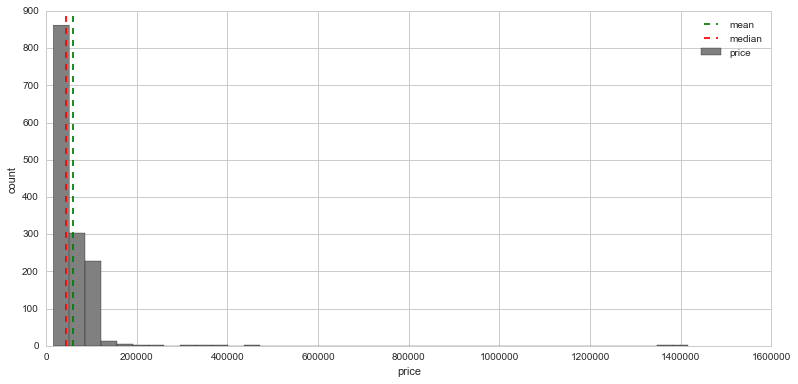

In [18]:
f,ax=plt.subplots(figsize=(13,6))
otw = data['price']
otw.index = range(len(otw))
ax.hist(otw,bins=40,color='grey')
plt.xlabel('price')
plt.ylabel('count')
ax.axvline(np.mean(otw), color='g', linestyle='--',label='mean') 
ax.axvline(np.median(otw), color='r', linestyle='--',label='median')
ax.legend(loc='upper right', numpoints = 2)

In [19]:
#заметим, что в выборке присутствуют 2 слишком дорогие квартиры - стоимостью более 1000000 pуб./мес.
#разрыв в цене между этими квартирами и ближайшими более дешевыми составляет около 1000000 pуб.
#более того заметим, что для квартир характерна "круглая" цена(с нулями на конце)
#Но(!) для двух самых дорогих квартир этот принцип не работает
display(data[data['price'] > 200000])

,price,district,time_to_centre,distance_to_metro,square,floor,max_floors,rooms_number,condition,bath,...,dishwasher,internet,phone,TV,pets,children,furniture,balcony,kitchen_furniture,fridge
1413,250000,Арбат,6,0.583333,200.0,10.0,17.0,4.0,дизайнерский,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1414,300000,Арбат,6,0.416667,200.0,11.0,17.0,4.0,евроремонт,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
1415,350000,Арбат,4,0.416667,200.0,10.0,17.0,4.0,дизайнерский,0.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1416,350000,Дорогомилово,8,1.083333,140.0,4.0,11.0,4.0,дизайнерский,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1417,350000,Раменки,14,5.000000,187.0,14.0,53.0,4.0,дизайнерский,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1418,380000,Раменки,15,5.000000,180.0,14.0,38.0,5.0,дизайнерский,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1419,390000,Хамовники,2,0.416667,175.0,5.0,9.0,4.0,евроремонт,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
1420,450000,Пресненский,12,0.333333,224.0,40.0,76.0,3.0,дизайнерский,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1421,450000,Пресненский,14,0.333333,223.0,40.0,76.0,3.0,дизайнерский,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1422,1349324,Якиманка,11,0.416667,360.0,10.0,10.0,5.0,дизайнерский,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [20]:
#все вышеперечисленное позволяет нам считать две самые дорогие выбросами
#удалим их из итоговой таблицы
data.drop(list(data[data['price'] > 1000000].index.values), inplace=True)

**2) Распределение квартир с различным количеством комнат по ценам**

In [21]:
#Рассмотрим данные распределения,чтобы представлять, как устроено предложение квартир 

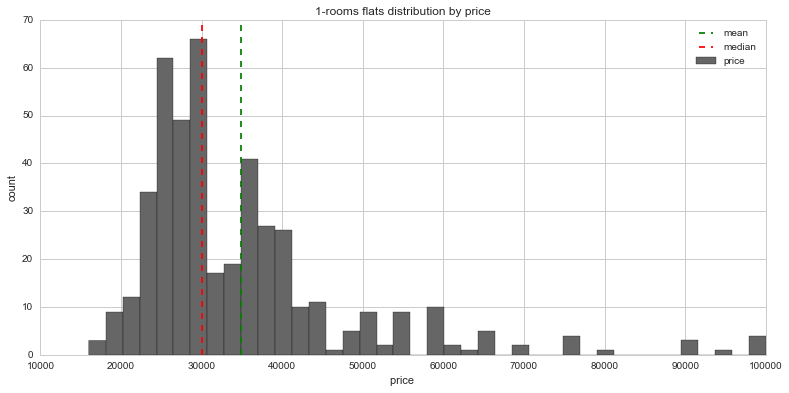

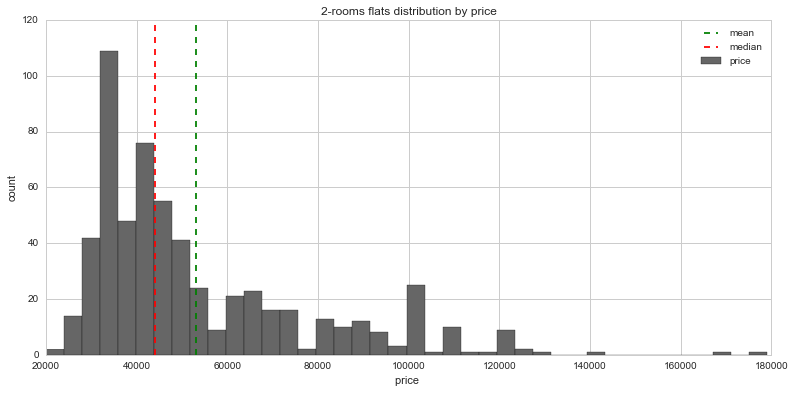

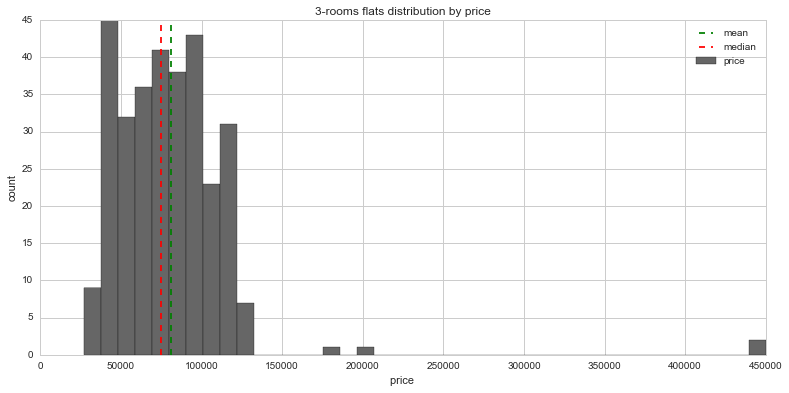

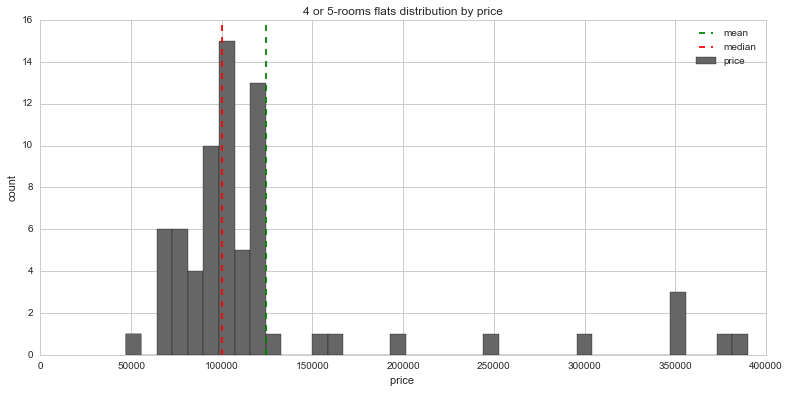

In [22]:
def draw_hists(i):
    f,ax=plt.subplots(figsize=(13,6))
    otw = data[data['rooms_number'] == i]['price']
    otw.index = range(len(otw))
    ax.hist(otw,bins=40,color='#666666')
    ax.set(title = str(i)+'-rooms flats distribution by price', xlabel='price ', ylabel='count')
    ax.axvline(np.mean(otw), color='g', linestyle='--',label='mean') 
    ax.axvline(np.median(otw), color='r', linestyle='--',label='median')
    ax.legend(loc='upper right', numpoints = 2)

for i in range(1,4):
    draw_hists(i)
    
f,ax=plt.subplots(figsize=(13,6))
otw = data[(data['rooms_number'] == 4)|(data['rooms_number'] == 5)]['price']
otw.index = range(len(otw))
ax.hist(otw,bins=40,color='#666666')
ax.set(title = '4 or 5-rooms flats distribution by price', xlabel='price ', ylabel='count')
ax.axvline(np.mean(otw), color='g', linestyle='--',label='mean') 
ax.axvline(np.median(otw), color='r', linestyle='--',label='median')
ax.legend(loc='upper right', numpoints = 2)

**3) Оборудование и удобства квартир**

In [23]:
#посмотрим на распределение бинарных признаков

Bath facilities


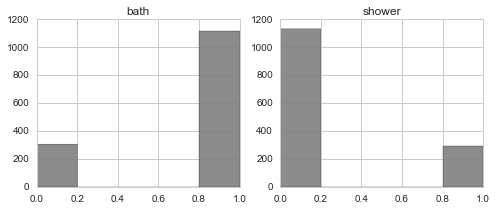

Equipment facilities


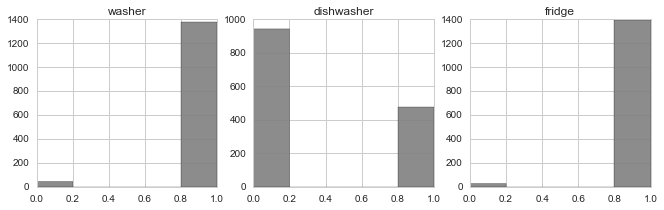

Comunication facilities


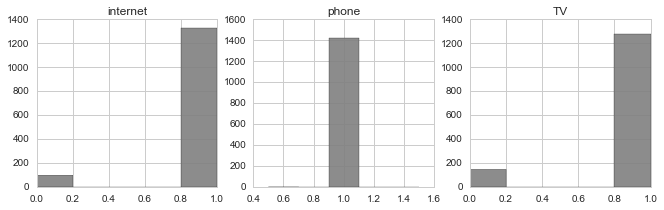

Cohabitant facilities


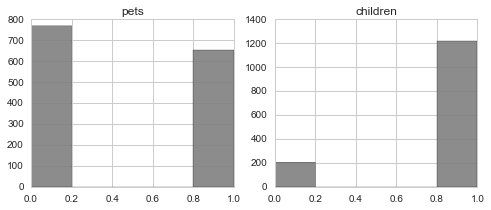

Furniture facilities


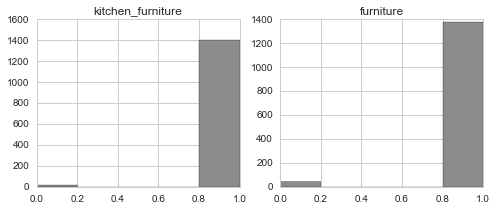

Area facilities


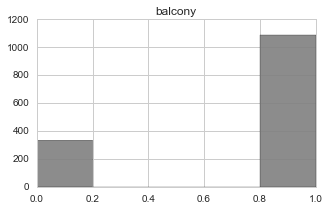

In [24]:
def draw_bin_hists(label, names):
    print(label)
    plt.figure(figsize=(2 + 3 * len(names), 3))
    for i in range(len(names)):
        plt.subplot(1, len(names), i + 1, title=names[i])
        plt.hist(data[names[i]], bins=5, color='#808080',alpha=0.9)
    plt.show()
    
draw_bin_hists('Bath facilities', ['bath', 'shower'])
draw_bin_hists('Equipment facilities', ['washer', 'dishwasher', 'fridge'])
draw_bin_hists('Comunication facilities', ['internet','phone', 'TV'])
draw_bin_hists('Cohabitant facilities', ['pets', 'children'])
draw_bin_hists('Furniture facilities', ['kitchen_furniture', 'furniture'])
draw_bin_hists('Area facilities', ['balcony'])


In [25]:
#заметим,что во всех рассмотренных квартирах есть телефон
data['phone'].value_counts()

1.0    1422
Name: phone, dtype: int64

In [26]:
#удалим из итоговой таблицы столбец с информацией о наличии телефона
data.drop('phone', axis=1, inplace=True)
data.columns

Index(['price', 'district', 'time_to_centre', 'distance_to_metro', 'square',
       'floor', 'max_floors', 'rooms_number', 'condition', 'bath', 'shower',
       'washer', 'dishwasher', 'internet', 'TV', 'pets', 'children',
       'furniture', 'balcony', 'kitchen_furniture', 'fridge'],
      dtype='object')

**Заметим**, что почти во всех квартирах(>= 1200 шт, напомним, что всего квартир 1424) есть стиральная машинка, холодильник, интернет, телевизор, мебель(в т.ч. кухонная), а также разрешено заселение с детьми.Более чем в 1000 квартирах есть ванна и балкон, также более чем в 1000 квартирах нет душевой кабины. Заселение с животными разрешено примерно в половине случаев, но все же чуть чаще(примерно в 750 случаях из 1424) оно запрещено. Посудомоечная машинка встречается примерно в каждой третьей квартире.

**4) Проверка гипотез**

**4.1 Проверим гипотезу о том, что цена квартиры завсисит от района, в котором расположена квартира **

In [27]:
#посмотрим, средние цены на квартиры с разным количеством комнат в различных районах

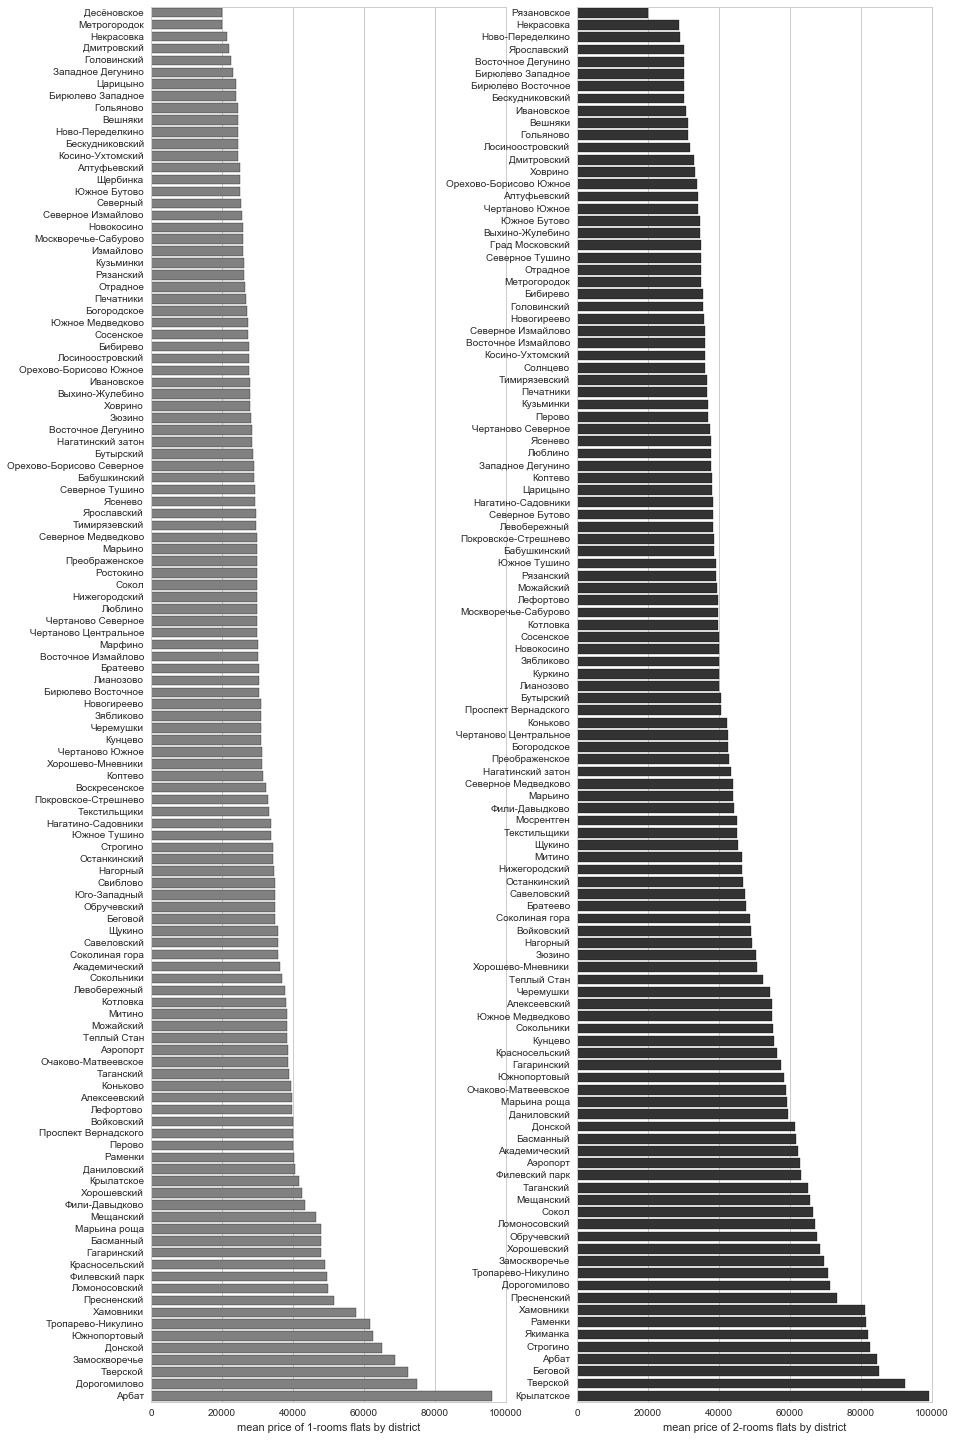

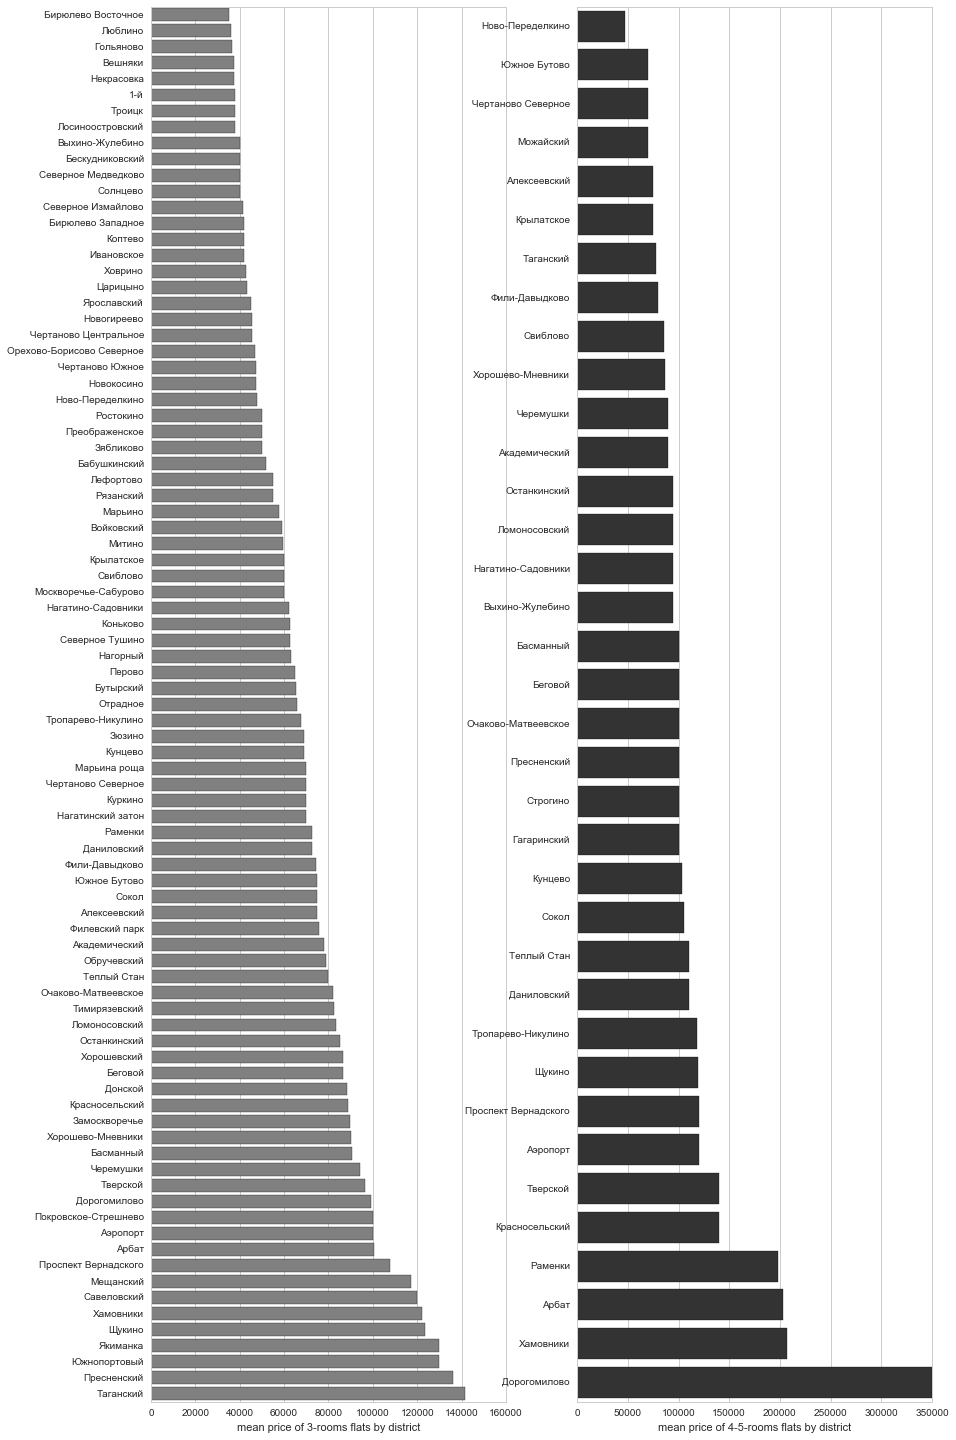

In [28]:
f, ax = plt.subplots(1,2,figsize=(14, 25))
res1=data[data['rooms_number']==1].groupby(['district'])['price'].mean().reset_index(name='price_mean').sort_values('price_mean')
res2=data[data['rooms_number']==2].groupby(['district'])['price'].mean().reset_index(name='price_mean').sort_values('price_mean')


sns.barplot(x="price_mean", y="district",data=res1, ax=ax[0],color="#808080")
sns.barplot(x="price_mean", y="district", data=res2, color="#333333",ax=ax[1])
ax[0].set(xlabel='mean price of 1-rooms flats by district', ylabel='')
ax[1].set(xlabel='mean price of 2-rooms flats by district', ylabel='')

f, ax = plt.subplots(1,2,figsize=(14, 25))
sns.set(style="whitegrid")
res3=data[data['rooms_number']==3].groupby(['district'])['price'].mean().reset_index(name='price_mean').sort_values('price_mean')
res4=data[(data['rooms_number']==4)|(data['rooms_number']==5)].groupby(['district'])['price'].mean().reset_index(name='price_mean').sort_values('price_mean')
sns.barplot(x="price_mean", y="district",data=res3, ax=ax[0],color="#808080")
sns.barplot(x="price_mean", y="district", data=res4, color="#333333",ax=ax[1])
ax[0].set(xlabel='mean price of 3-rooms flats by district', ylabel='')
ax[1].set(xlabel='mean price of 4-5-rooms flats by district', ylabel='')

** 4.2 Для проверки остальных гипотез рассмотрим корреляции цены квартиры и различных признаков**

In [29]:
#присвоим каждому типу ремонта в столбце condition числовое значение от 1 до 3:
#1-косметический,2-евроремонт,3-дизайнерский
#таким образом котегориальный порядковый признак переводится в численный
def level(condition):
    return 1 if  condition == 'косметический'\
            else 2 if condition == 'евроремонт' else 3

data['condition'] = data['condition'].apply(level)


In [30]:
#выберем те признаки, корреляцию которых с ценой можно посчитать
features = ['time_to_centre', 'distance_to_metro', 'square', 'floor',
            'max_floors', 'rooms_number', 'condition', 'bath', 'shower', 'washer',
            'dishwasher', 'internet', 'TV', 'pets', 'children', 'furniture', 'balcony',
            'kitchen_furniture', 'fridge']

In [31]:
#выведем всевозможные корреляции с ценой
for t in features:
    print("corr (price," + t + ') = ' + str(stats.pearsonr(data['price'],data[t])[0]))

corr (price,time_to_centre) = -0.449456747297
corr (price,distance_to_metro) = -0.158158586228
corr (price,square) = 0.802308409969
corr (price,floor) = 0.258119258797
corr (price,max_floors) = 0.359924709188
corr (price,rooms_number) = 0.578721867325
corr (price,condition) = 0.482203766079
corr (price,bath) = -0.0890540161937
corr (price,shower) = 0.420828469633
corr (price,washer) = 0.0136766831868
corr (price,dishwasher) = 0.512279875684
corr (price,internet) = 0.00602754703692
corr (price,TV) = 0.0639675049123
corr (price,pets) = 0.020055798012
corr (price,children) = -0.0310875422026
corr (price,furniture) = 0.0121980443772
corr (price,balcony) = -0.216345038316
corr (price,kitchen_furniture) = -0.024704522832
corr (price,fridge) = -0.0392224654487


In [32]:
#будем считать значимой корреляцию не меньше 0.4
print("Significant correlation coefficients(|corr| >= 0.4):\n")
corr_list = []
for t in features:
    if abs(stats.pearsonr(data['price'],data[t])[0]) >= 0.4:
        corr_list.append(abs(stats.pearsonr(data['price'],data[t])[0]))
        print("corr (price," + t + ') = ' + str(stats.pearsonr(data['price'],data[t])[0]))

Significant correlation coefficients(|corr| >= 0.4):

corr (price,time_to_centre) = -0.449456747297
corr (price,square) = 0.802308409969
corr (price,rooms_number) = 0.578721867325
corr (price,condition) = 0.482203766079
corr (price,shower) = 0.420828469633
corr (price,dishwasher) = 0.512279875684


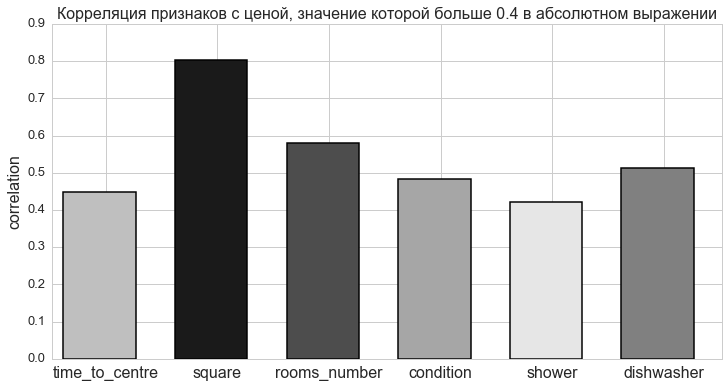

In [33]:
f,ax=plt.subplots(figsize=(12,6)) 
plt.xlim(0.9,6.9) 
plt.bar([1,2,3,4,5,6], corr_list,color=['#bfbfbf','#1a1a1a','#4d4d4d','#a6a6a6','#e6e6e6','#808080'],width=0.65,edgecolor ='black',linewidth=1.5) 
plt.xticks([1.38,2.38,3.38,4.38,5.38,6.38], ('time_to_centre', 'square', 'rooms_number', 'condition','shower','dishwasher'),size=16) 
plt.yticks(size=13) 
plt.ylabel('correlation',size=16) 
plt.title("Корреляция признаков с ценой, значение которой больше 0.4 в абсолютном выражении",size=16)

**4.3 Проверка гипотезы о том, что цена и площадь квартиры положительно кореллированы**  

In [34]:
 print("corr (price, square) = " + str(stats.pearsonr(data['price'],data['square'])[0]))

corr (price, square) = 0.802308409969


**Вывод**: гипотеза подтверждается.

Продемонстрируем графически тот факт, что корреляция цены и площади квартиры, действительно, положительна и очень велика

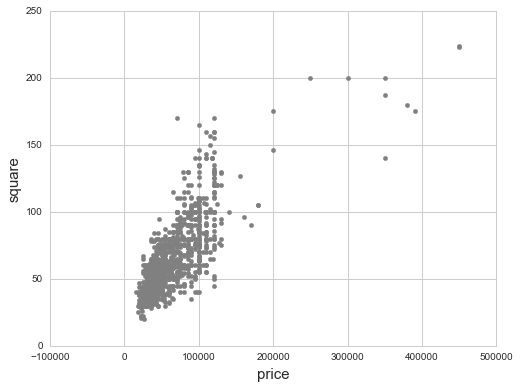

In [35]:
f,ax=plt.subplots(figsize=(8, 6))
plt.scatter(data['price'],data['square'],color='#808080')
plt.ylabel('square', size=15)
plt.xlabel('price', size=15)
plt.show()

**Замечание**: в данной работе мы не формулируем гипотезу о том, что цена квартиры положительно коррелирована с количеством комнат, так как колличество комнат и площадь квариры имеют очень значительную положительную корреляцию, мы ограничиваемся только признаком "площадь квартиры"

In [36]:
print("corr (rooms_number,square) = " + str(stats.pearsonr(data['rooms_number'],data['square'])[0]))

corr (rooms_number,square) = 0.806535454641


**4.4 Проверка гипотезы о том, что цена квартиры и время, которое нужно потратить, чтобы добраться до центра, отрицательно кореллированы**  

In [37]:
 print("corr (price, time_to_centre) = " + str(stats.pearsonr(data['price'],data['time_to_centre'])[0]))

corr (price, time_to_centre) = -0.449456747297


**Вывод**: гипотеза подтверждается.

Продемонстрируем графически значимую отрицательную корреляцию цены квартиры и времени до центра.

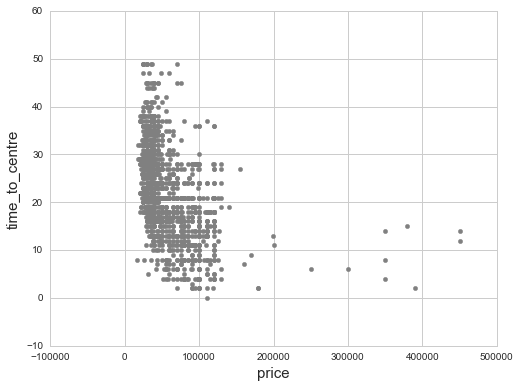

In [38]:
f,ax=plt.subplots(figsize=(8, 6))
plt.scatter(data['price'],data['time_to_centre'],color='#808080')
plt.ylabel('time_to_centre',size=15)
plt.xlabel('price',size=15)
plt.show()

** 4.5 Цена квартиры и тип ремонта положительно коррелированы(чем лучше тип ремонта, тем больше цена)**

In [39]:
print("corr (price, condition) = " + str(stats.pearsonr(data['price'],data['condition'])[0]))

corr (price, condition) = 0.482203766079


**Вывод** гипотеза подтверждается.

Чтобы продемонстрировать эту взаимосвзяь между ценой и типом ремонта построим график распределения квартир с разными типами ремонта.

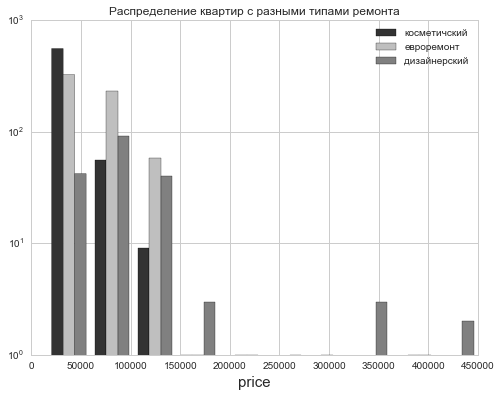

In [40]:
f, ax = plt.subplots(figsize=(8, 6))
plt.hist([data[data['condition']== 1]['price'],
          data[data['condition']== 2]['price'],
          data[data['condition']== 3]['price']],
         color=['#333333','#bfbfbf','#808080'],
         label=['косметичский','евроремонт','дизайнерский'],bins=10,
        log = True)#применим логарифмическую шкалу для лучшего отображения данных

ax.set_title(u'Распределение квартир с разными типами ремонта')
ax.legend(loc='upper right')
plt.xlabel('price',size=15)

Исходя из данных можно сделать следующий **вывод:** в квартирах стоимостью до 50 тыс. преобладает косметический тип ремонта(самый дешевый тип); в квартирах стоимостью более 50 тыс., но менее 150 тыс. преобладает евроремонт; в квартирах стоимостью более 150 тыс. преобладает дизайнерский тип ремонта(самый дорогой тип ремонта), а косметического и евроремонта не остается.
Это означает, что чем дороже квартира, тем чаще встречается более дорогой(по оношению к косметическому) тип ремонта.

**4.6. Проверка гипотезы о том, что цена квартиры отрицательно коррелирована с расстоянием до метро **

Заметим, что наша первоначальная гипотеза о цене квартиры и расстоянии до метро не подтверждается, так не наблюдается значимой корреляции.

In [41]:
print("corr (price,distance_to_metro) = " + str(stats.pearsonr(data['price'],data['distance_to_metro'])[0]))

corr (price,distance_to_metro) = -0.158158586228


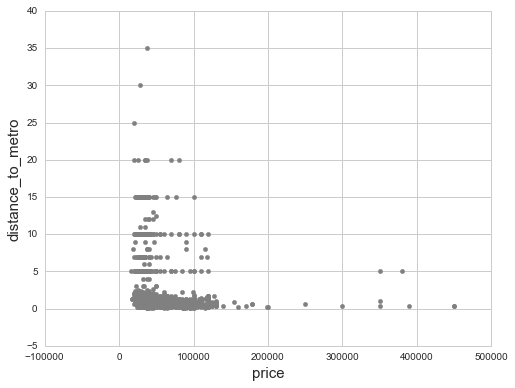

In [42]:
f,ax=plt.subplots(figsize=(8, 6))
plt.scatter(data['price'],data['distance_to_metro'],color='#808080')
plt.ylabel('distance_to_metro',size=15)
plt.xlabel('price',size=15)
plt.show()

Попробуем сформулировать другую **гипотезу** относительно корреляции цены квартиры и расстояния до метро:

Цена квартиры отрицательно коррелирована с расстоянием до метро, если квартира находится в пешей доступности от метро(менее 1.5 км), если же квартира находится далеко от метро(более 1.5 км), то такой связи не наблюдается.

In [43]:
#разделим выборку на две подвыборки

#1 - квартиры с расстоянием до метро менее 1.5 км
data_near = data[data['distance_to_metro'] < 1.5]
#2 - квартиры с расстоянием до метро не менее 1.5 км
data_far = data[data['distance_to_metro'] >= 1.5]

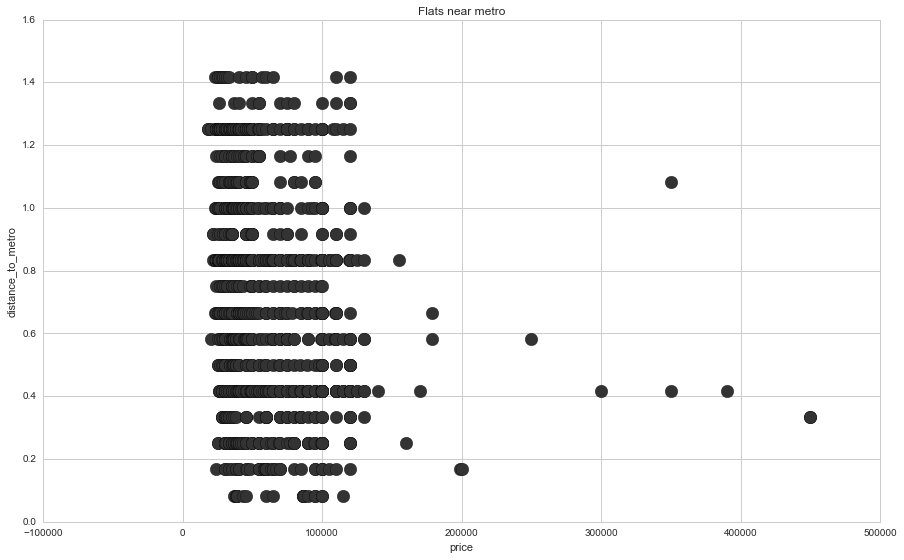

corr (price, distance_to_metro)= -0.204453364568


In [44]:
#1 - квартиры с расстоянием до метро менее 1.5 км
f,ax=plt.subplots(figsize=(15, 9))
plt.scatter(data_near['price'],data_near['distance_to_metro'],color='#333333',edgecolors='black',s=np.pi*50)
plt.ylabel('distance_to_metro')
plt.xlabel('price')
plt.title('Flats near metro')
plt.show()
print('corr (price, distance_to_metro)= ' + 
      str(stats.pearsonr(data_near['price'],data_near['distance_to_metro'])[0]))

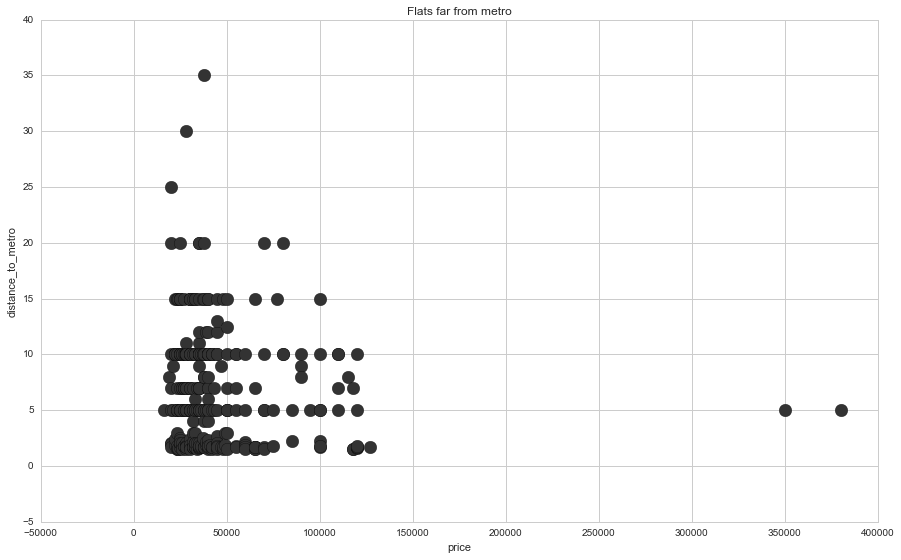

corr (price, distance_to_metro)= -0.0763484682138


In [45]:
#2 - квартиры с расстоянием до метро не менее 1.5 км
f,ax=plt.subplots(figsize=(15, 9))
plt.scatter(data_far['price'],data_far['distance_to_metro'],color='#333333',edgecolors='black',s=np.pi*50)
plt.ylabel('distance_to_metro')
plt.xlabel('price')
plt.title('Flats far from metro')
plt.show()
print('corr (price, distance_to_metro)= ' + 
      str(stats.pearsonr(data_far['price'],data_far['distance_to_metro'])[0]))

**Заметим**, что гипотеза  частично подтвердилась:

* если квартира находится далеко от метро(не менее 1.5 км), то расстояние до метро никак не коррелирует с ценой квартиры (подтверждение гипотезы)
* если квартира находится в пешей доступности от метро, то расстояние до метро и цена коррелированы отрицательно, однако коэффициент корреляции слишком мал(по абсолютном значению), чтобы считать его значимым (опровержение гипотезы)

**Вывод**: не наблюдатеся значимой отрицательной корреляции между ценой квартиры и расстоянием до метро.

** Часть 2** 
-----------

**1) Преобразуем переменную district в бинарную**

In [46]:
n=pd.get_dummies(data['district'],prefix='district')

data = pd.concat([data,n],axis=1)
data.head()

,price,district,time_to_centre,distance_to_metro,square,floor,max_floors,rooms_number,condition,bath,...,district_Щербинка,district_Щукино,district_Юго-Западный,district_Южное Бутово,district_Южное Медведково,district_Южное Тушино,district_Южнопортовый,district_Якиманка,district_Ярославский,district_Ясенево
0,16000,Раменки,8,5.000000,40.0,12.0,17.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18000,Головинский,29,1.250000,30.0,1.0,5.0,1.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,18000,Новокосино,32,1.250000,25.0,1.0,3.0,1.0,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19000,Некрасовка,29,8.000000,40.0,6.0,17.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20000,Бутырский,18,0.583333,31.0,5.0,5.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 **2) Шкалирование**


Так как размерность данных сильно отличается, приведем все непрерывные значения при помощи процедуры minmax к значениям, лежащим в интервале [0,1]

In [47]:
from sklearn import preprocessing  
def min_max_scaler(columns):
    min_max_scaler = preprocessing.MinMaxScaler()
    data[columns]=min_max_scaler.fit_transform(data[columns].reshape(-1,1))
for_normalizing=['price', 'time_to_centre','distance_to_metro', 'square'] 
for i in for_normalizing:
    min_max_scaler(i)
    


C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [48]:
data.head()

,price,district,time_to_centre,distance_to_metro,square,floor,max_floors,rooms_number,condition,bath,...,district_Щербинка,district_Щукино,district_Юго-Западный,district_Южное Бутово,district_Южное Медведково,district_Южное Тушино,district_Южнопортовый,district_Якиманка,district_Ярославский,district_Ясенево
0,0.000000,Раменки,0.163265,0.140811,0.098039,12.0,17.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.004608,Головинский,0.591837,0.033413,0.049020,1.0,5.0,1.0,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.004608,Новокосино,0.653061,0.033413,0.024510,1.0,3.0,1.0,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006912,Некрасовка,0.591837,0.226730,0.098039,6.0,17.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.009217,Бутырский,0.367347,0.014320,0.053922,5.0,5.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**3) Понижение размерности данных - метод главных компонент**

In [49]:
from sklearn.decomposition import PCA 

In [50]:
data_fe = data.drop(['price', 'district'], axis=1)
pca = PCA(n_components = 10)
pca_data = pd.DataFrame(pca.fit_transform(data_fe))
pca_data.head()

,0,1,2,3,4,5,6,7,8,9
0,5.847919,-2.337299,-1.333036,0.158105,0.374266,-0.525812,0.626042,0.412730,-0.124468,-1.013284
1,-10.051388,1.124733,-0.910433,0.098723,0.469317,-1.246383,0.018883,-0.071550,0.212958,0.154906
2,-11.757800,0.123808,-0.507359,-0.646991,0.789073,-0.292859,0.145138,0.713020,-0.116863,0.028286
3,2.829181,2.836504,-1.413465,0.497664,0.498905,-0.081060,-0.205470,-0.128162,1.052691,-0.070830
4,-8.039140,-2.328701,-0.959963,0.175322,0.585142,-0.529264,0.482226,0.426749,0.088535,0.075617


In [51]:
#посмотрим сколько компонент объясняют 90% дисперсии
d = 0
k = 0
while d < 0.9:
    d = d + pca.explained_variance_ratio_[k]
    k = k+1
    print(d, k)

0.815701451048 1
0.955811441068 2


In [52]:
#найдем признак из 1 компоненты с самым большим весом
c = max(pca.components_[0])
n = 0
for i in range(len(pca.components_[0])):
    if pca.components_[0][i] == c:
        n = i
print(data_fe.columns[n])


max_floors


**Выводы:** 
* две компоненты объясняют 90% дисперсии
* заметим, что мы получили неожиданный результат, когда искали признак из 1-ой компоненты с самым большим весом - max_floors
* мы считаем, что этот метод плохо применим для данных, в кторых есть много дискретных признаков, поэтому далее мы его не используем

**4) Для регрессии будем использовать слеующие модели:**
* sklearn.tree.DecisionTreeRegressor

* sklearn.linear_model.LinearRegression

* sklearn.ensemble.RandomForestRegressor

In [53]:
from sklearn import cross_validation, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error ,r2_score,accuracy_score
from sklearn.cross_validation import train_test_split,KFold,cross_val_score
from sklearn.metrics import roc_curve, auc
import pylab as pl

**5) Для регрессии будем использовать слеующие меры качества:**

* sklearn.metrics.r2_score

In [54]:
value_score={}

*а)LinearRegression*

Посмотрим на все возможные корреляции между признаками, чтобы определить, какие признаки значимо коррелируют, и удалить некоторые из них, чтобы при предсказании цен с помощью алгоритма линейной регрессии не появилось "шумов".

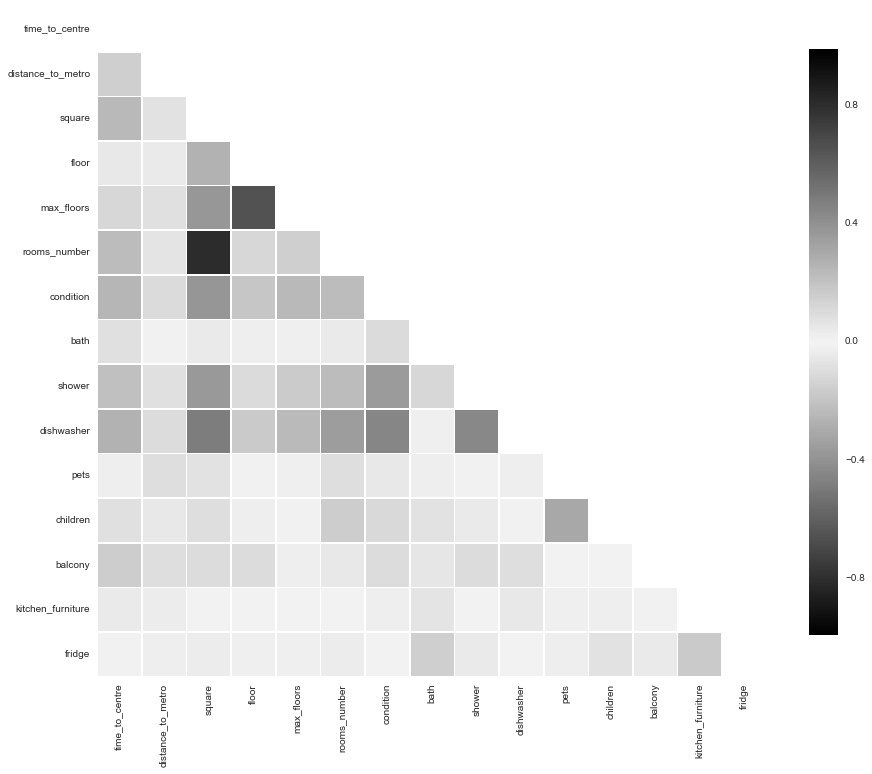

In [55]:
f, ax = plt.subplots(figsize=(15, 15)) 

corr=data[['time_to_centre', 'distance_to_metro', 'square', 'floor','max_floors',
           'rooms_number', 'condition', 'bath', 'shower','dishwasher', 'pets',
           'children', 'balcony','kitchen_furniture', 'fridge']].corr()

sns.set(style="white")
 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(240, 100, s=0, l=0, sep=1, n=10, center='light', as_cmap=True)
sns.heatmap(corr, vmax=.99,cmap=cmap,mask=mask,square=True,linewidths=.7, cbar_kws={"shrink": .7}, ax=ax)

In [56]:
features_list = ['time_to_centre', 'distance_to_metro', 'square', 'floor','max_floors',
                         'rooms_number', 'condition', 'bath', 'shower','dishwasher', 'pets',
                         'children', 'balcony','kitchen_furniture', 'fridge']
for i in range(15):
    for j in range(i+1, 15):
        if stats.pearsonr(data[features_list[i]],data[features_list[j]])[0] >= 0.8:
            print(features_list[i] +',' + features_list[j]+', corr = ' + 
                  str(stats.pearsonr(data[features_list[i]],data[features_list[j]])[0]))

square,rooms_number, corr = 0.806535454641


Значимая корреляция(здесь более 0.8) наблюдается только между одной парой признаков:
* площадь и количество комнат

In [57]:
#удалим признак rooms_number, а также удулим категориальный признак district
data=data.drop(['district'],axis=1)
data_for_linreg = data.drop('rooms_number', axis=1)


In [58]:
X_linreg = data_for_linreg.drop('price',1) 
Y_linreg = data_for_linreg['price']

In [63]:
model_L = LinearRegression()
cross = KFold(X_linreg.shape[0],5,shuffle=True)
score_L = cross_val_score(model_L,X_linreg, Y_linreg, cv=cross, scoring='r2').mean()
value_score['LinearRegression']=score_L
print("Качество = ",score_L)

Качество =  -2.67959330901e+20


Как видно, качество регрессии не очень большое, возможно, данная модель на наших данных страдает переобучением, для того, чтобы проверить это утверждение воспользуемся L2 регуляризацией.

sklearn.linear_model.Ridge(Linear least squares with l2 regularization)

In [64]:
from sklearn.linear_model import Ridge

model_R = Ridge(1)
сross = KFold(X_linreg.shape[0],5,shuffle=True)
score_R = cross_val_score(model_R, X_linreg, Y_linreg,cv=сross,scoring='r2').mean()
if score_L<score_R:
    value_score['LinearRegression']=score_R
print("Качество = ",score_R)


Качество =  0.774690692278


Качество алгоритма после добавления регуляризации почти не изменилось.

Посмотрим на важности признаков(коэффициент в регрессии)

In [159]:

model_R.fit(X_linreg[X_linreg.columns[0:19]], Y_linreg)
c=model_R.coef_
c1=abs(c)
c1=c1.argsort()[::-1]
c=c.tolist()
print("Признак (важность)")
for i in c1[:10]:
    print(X_linreg.columns[0:19][i]," (", c[i],')')


Признак (важность)
square  ( 0.38010223414689787 )
time_to_centre  ( -0.11155283295168784 )
distance_to_metro  ( -0.04971373206931285 )
kitchen_furniture  ( -0.021727526713350927 )
balcony  ( -0.021527521859982628 )
shower  ( 0.012956730442383057 )
condition  ( 0.012896176507336786 )
dishwasher  ( 0.01094783568166108 )
children  ( -0.0099914831954361 )
furniture  ( 0.008461173609072026 )


In [158]:
X_linreg.columns[0:20]

Index(['time_to_centre', 'distance_to_metro', 'square', 'floor', 'max_floors',
       'condition', 'bath', 'shower', 'washer', 'dishwasher', 'internet', 'TV',
       'pets', 'children', 'furniture', 'balcony', 'kitchen_furniture',
       'fridge', 'district_1-й', 'district_Академический'],
      dtype='object')

**Выводы:** 
* Качество алгоритма линейной регрессии не слишком большое
* Добавление регуляризации, значительно не улучшило качетсво алгоритма, значит, данная модель не страдает переобучением на наших данных, просто не очень хорошо подходит к ним

*b)DecisionTreeRegressor*

In [161]:
X_features = data.drop('price',1) 
Y_answ = data['price']

In [162]:
#найдем оптимальную глубину дерева и максимальное качество алгоритма
#оптмальная глубина дерева - гиперпараметр, который мы подбираем с помощью кросс-валидации
score_T=[]
for i in range(20):
    model_T=DecisionTreeRegressor(max_depth=i+1)
    cross=KFold(X_features.shape[0],5,shuffle=True)
    r=cross_val_score(model_T,X_features,Y_answ,cv=cross,scoring='r2').mean()
    score_T.append(r)
depth=score_T.index(max(score_T))+1
value_score['DecisionTreeRegressor']=max(score_T)

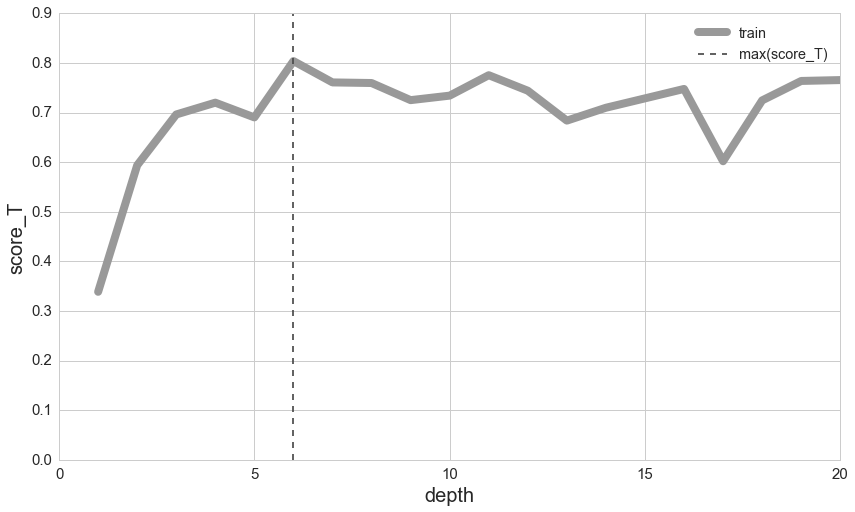

In [163]:
#построим качество алгоритма 
sns.set(style="whitegrid")
x=[i+1 for i in range(20)]

fig, ax = plt.subplots(figsize=(14,8)) 


plt.plot(x,score_T,color='#999999',linewidth=8.0,label='train') 
 
plt.axvline(score_T.index(max(score_T))+1,label='max(score_T)',linestyle='--',color='#4d4d4d')
ax.legend(fontsize='large') 

plt.xlabel("depth",size=20) 
plt.xticks(size=15) 

plt.ylabel("score_T",size=20) 
plt.yticks([x/10 for x in range(10)],size=15) 
plt.show()



In [164]:
print('Оптимальная глубина дерева =',depth,"; Качество = ",max(score_T))

Оптимальная глубина дерева = 6 ; Качество =  0.803917188947


Важность:

In [168]:
model=DecisionTreeRegressor(max_depth=depth)
model.fit(X_features,Y_answ)
importances=model.feature_importances_
indices = np.argsort(importances)[::-1]
print('   Features (importance)')

for i in range(10):
    print()
    print("%d. %s (%f)" %(i+1,X_features.columns[indices[i]],importances[indices[i]]))

   Features (importance)

1. square (0.811976)

2. time_to_centre (0.096317)

3. condition (0.017257)

4. dishwasher (0.016396)

5. district_Пресненский (0.014118)

6. distance_to_metro (0.008822)

7. max_floors (0.008801)

8. district_Таганский (0.008232)

9. district_Тверской (0.004480)

10. children (0.004378)


**Выводы:** с помощью кросс-валидации мы подобрали гиперпараметр - оптимальную глубину дерева(около 5-10, по-разному при разных запусках), на которой алгоритм выдает наилучшее качество (около 80%), однако качество алгоритма решающего дерева даже на оптимальной глубине не сильно превышает качество алгоритма линейной регрессии. Более того, после глубины 5 качество достигает примерно 75%, но заметна сильная флуктуация качества (до 10-15%) для различных глубин деревьев. Это означает, что данный алгоритм также не слишком хоршо работает на наших данных.

*c)RandomForestRegressor*

In [170]:
#найдем оптимальное количество деревьев и максимальное качество алгоритма
#оптмальная количество деревьев - гиперпараметр, который мы подбираем с помощью кросс-валидации
score_F=[]
for i in range(1,21):
    model_F=RandomForestRegressor(i)
    cross=KFold(X_features.shape[0],5,shuffle=True)
    r=cross_val_score(model_F,X_features,Y_answ,cv=cross).mean()
    score_F.append(r)

In [171]:
depth=score_F.index(max(score_F))+1
value_score['RandomForestRegressor']=max(score_F)

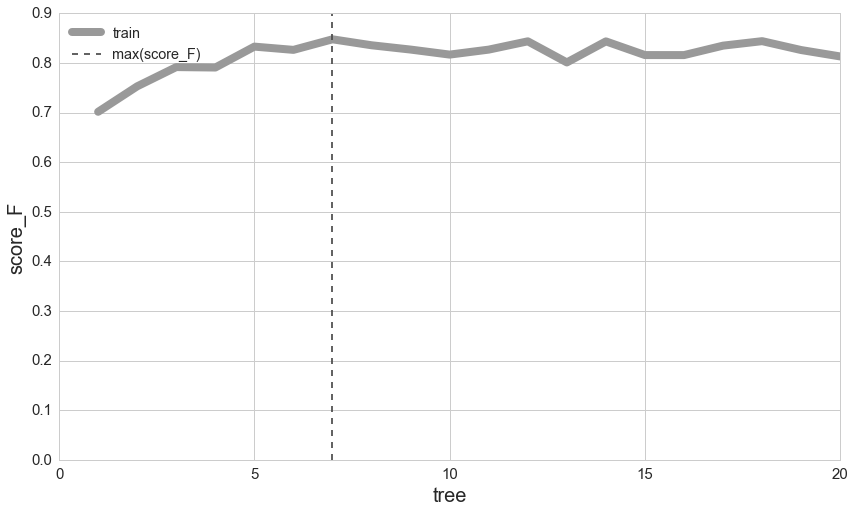

In [172]:
fig, ax = plt.subplots(figsize=(14,8)) 

x=[i for i in range(1,21)]
plt.plot(x,score_F,color='#999999',linewidth=8.0,label='train') 
 
plt.axvline(score_F.index(max(score_F))+1,label='max(score_F)',linestyle='--',color='#4d4d4d')
ax.legend(fontsize='large', loc = 2) 

plt.xlabel("tree",size=20) 
plt.xticks(size=15) 

plt.ylabel("score_F",size=20) 
plt.yticks([x/10 for x in range(10)],size=15) 
plt.show()

In [173]:
print('Оптимальное количество деревьев =',depth,"; Качество = ",max(score_F))

Оптимальное количество деревьев = 7 ; Качество =  0.847768228807


Важность:

In [174]:
model=RandomForestRegressor(depth)
model.fit(X_features,Y_answ)
importances=model.feature_importances_
indices = np.argsort(importances)[::-1]
print('   Features (importance)')

for i in range(10):
    print()
    print("%d. %s (%f)" %(i+1,X_features.columns[indices[i]],importances[indices[i]]))

   Features (importance)

1. square (0.760610)

2. time_to_centre (0.097731)

3. distance_to_metro (0.019789)

4. max_floors (0.018531)

5. condition (0.017698)

6. floor (0.012823)

7. dishwasher (0.011848)

8. district_Дорогомилово (0.008085)

9. district_Тверской (0.006689)

10. balcony (0.005570)


**Выводы:** с помощью кросс-валидации мы подобрали гиперпараметр - оптимальное количество деревьев (10 - 20), на котором алгоритм выдает наилучшее качество (80 - 85%). Заметим, что несмотря на то, что наилучшее качество алгоритма рандомного леса не сильно превышает наилучшее качество других алгоритмов, уже при количестве деревьев больше 5 качество превышает 80%, более того, не наблюдается сильной флактуации качества в зависимости от количества деревьев. Это значит, что выбирая количество деревьев от 10 до 20, мы почти гарантированно получим качество более 80%, чего не удавалось добиться ни в одном другом алгоритме, рассмотренном выше. Этот алгоритм подходит под наши данные лучше всего.

**7)Найдем наилучшую модель**

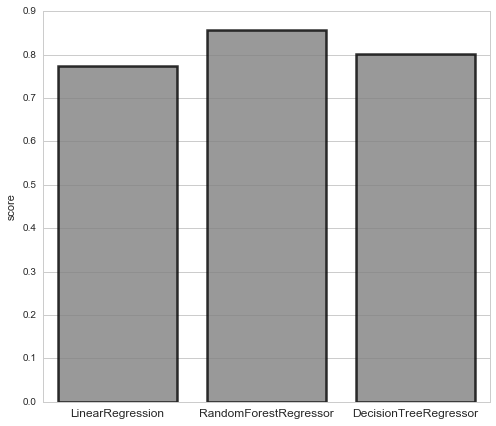

In [95]:
#посмотрим на качество 3-х алгоритмов
fig, ax = plt.subplots(figsize=(8,7)) 

df=pd.DataFrame.from_dict(data = value_score, orient='index')
df[1]=df.index

sns.barplot(x=1, y=0,data=df, color="#808080",linewidth=2.5,alpha=0.8,errcolor=".2")
plt.xlabel(' ')
plt.xticks(size=12)
plt.ylabel('score')
plt.yticks(size=10)
plt.show()

Модель RandomForestRegressor лучше всего подходит для выбранных нами данных, так как имеет наибольшее качество (коэффициент детерминации) из всех трех моделей

**8) Кластеризация**

Посмотрим, может ли кластеризация хорошо работать на наших данных

Посмотрим на площадь и цены, которые коррелируют сильно и на бинарные признаки, которые тоже сильно коррелируют с ценой

Первый признак - **shower**

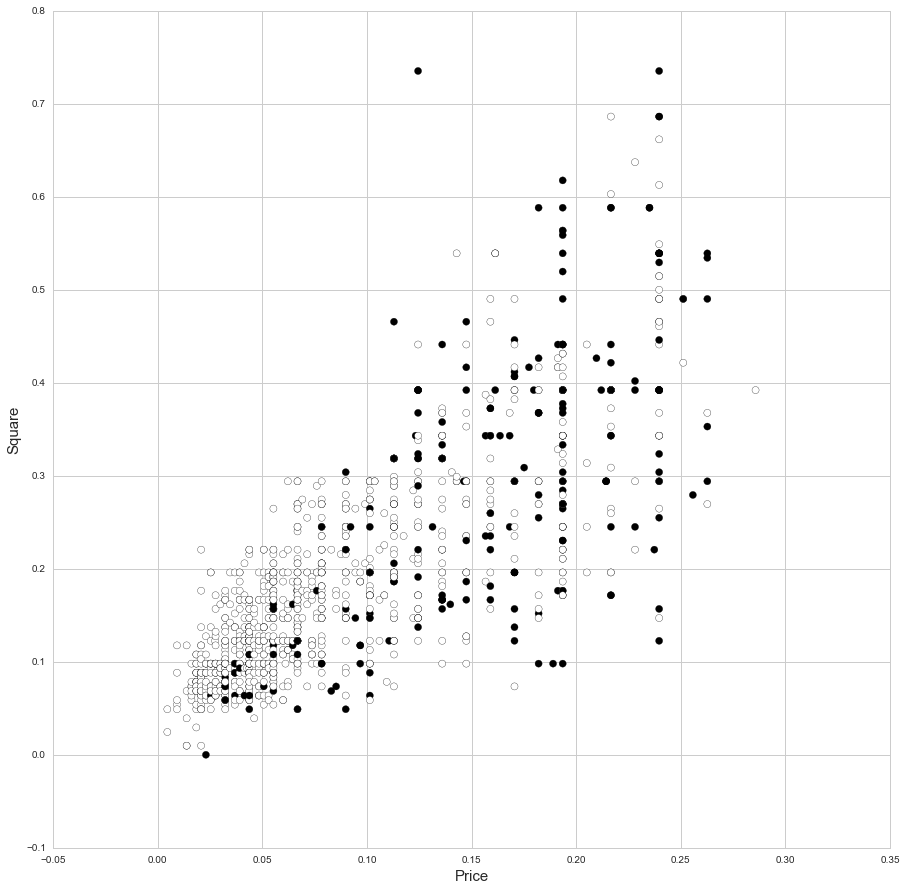

In [69]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
fig, ax = plt.subplots(figsize=(15,15))
d=data[(data['distance_to_metro']<0.1) & (data['price']<0.3 )]

#ax.scatter(d['square'],d['price'],c=data['condition'])
plt.scatter(d['price'],d['square'],c=d['shower'],s=50)
plt.xlabel('Price',size=15)
plt.ylabel("Square",size=15)

0.17660576733103117

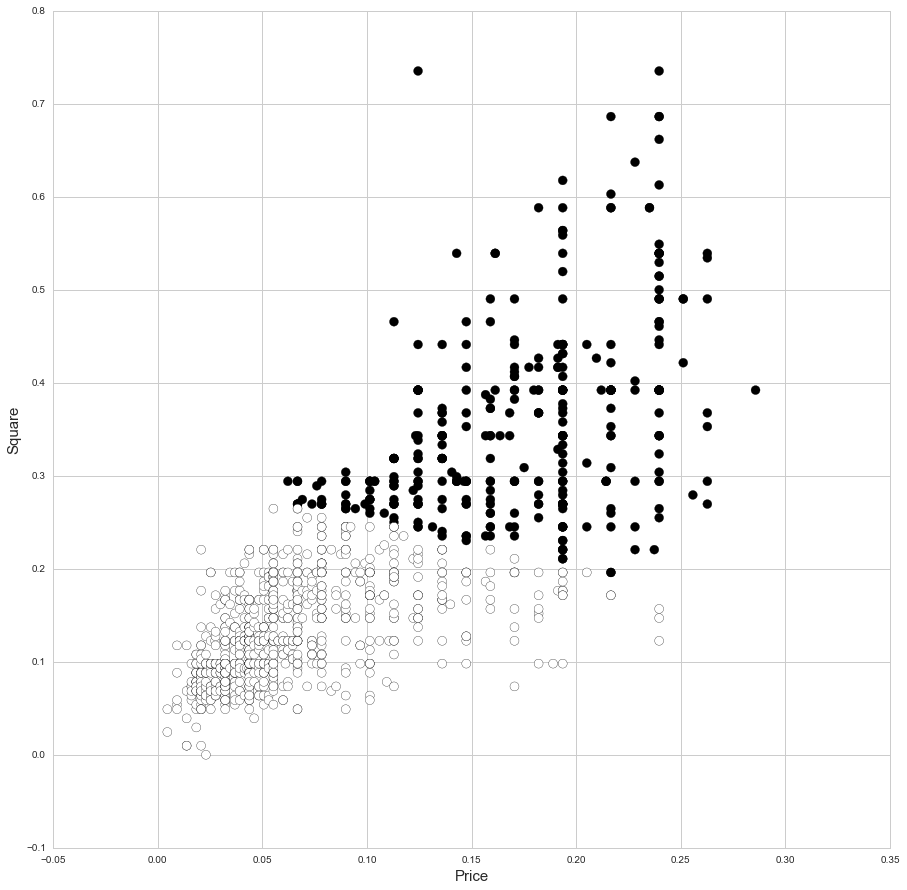

In [70]:
cluster=KMeans(n_clusters=2)
fig = plt.subplots(figsize=(15,15))
y_pred=cluster.fit_predict(d[['price','square']])
plt.scatter(d['price'],d['square'],c=y_pred,s=80)
plt.xlabel('Price',size=15)
plt.ylabel("Square",size=15)
adjusted_rand_score(d['shower'], y_pred)

Видим, что для душа кластеризация работает плохо, так как нет определенной, даже размытой,
границы между кластерами в нашей выборке

Посмотрим на **dishwasher**

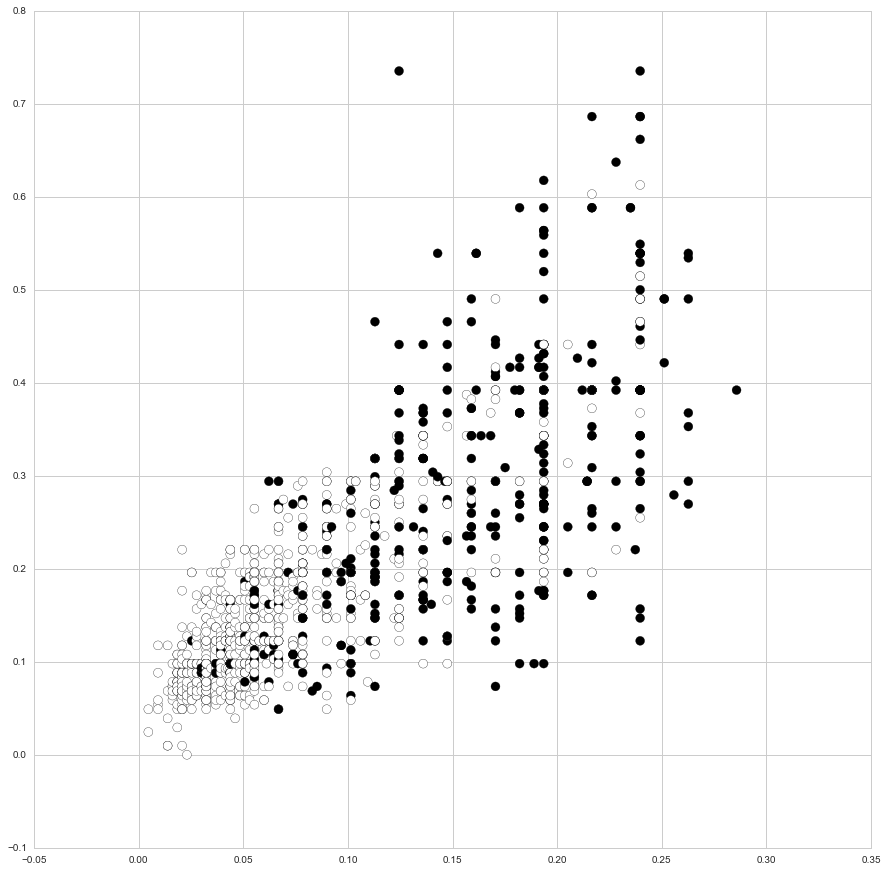

In [71]:
fig = plt.subplots(figsize=(15,15))
d=d[d['square']<1]
d
plt.scatter(d['price'],d['square'],c=d['dishwasher'],s=80)

0.2652728276264254

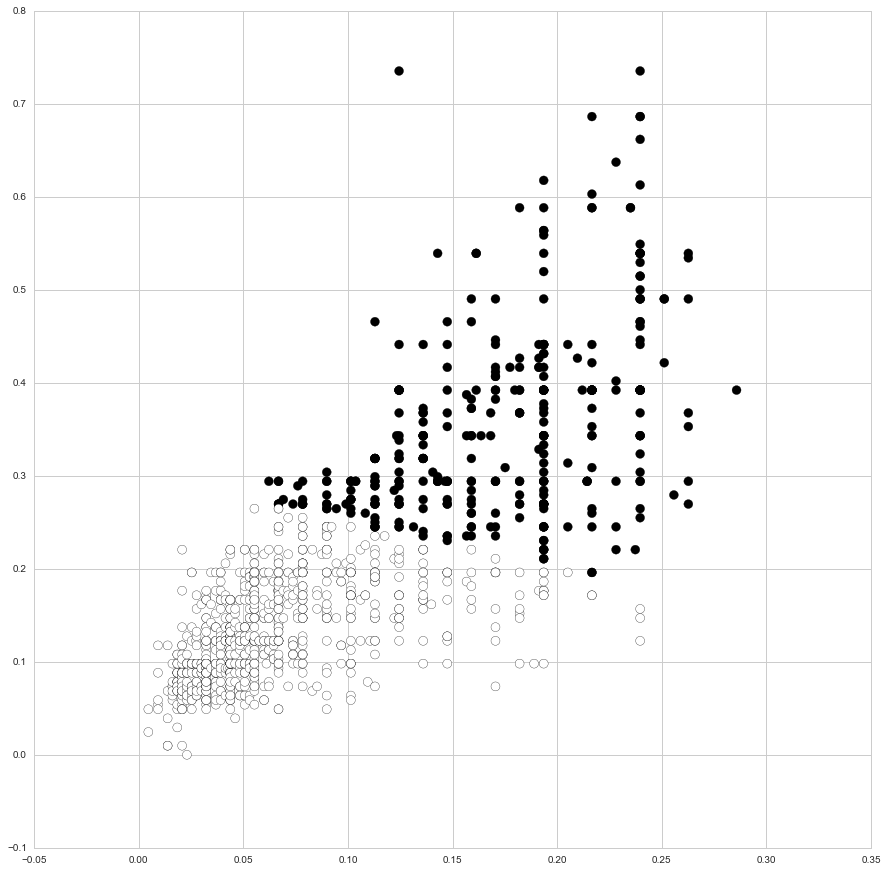

In [72]:
fig, ax = plt.subplots(figsize=(15,15))
cluster=KMeans(n_clusters=2)


y_pred=cluster.fit_predict(d[['price','square']])
plt.scatter(d['price'],d['square'],c=y_pred,s=80)
adjusted_rand_score(d['dishwasher'], y_pred)

Лучше, но все равно мало

В конце посмотрим на качество кластеризации при разбиении по **condition**

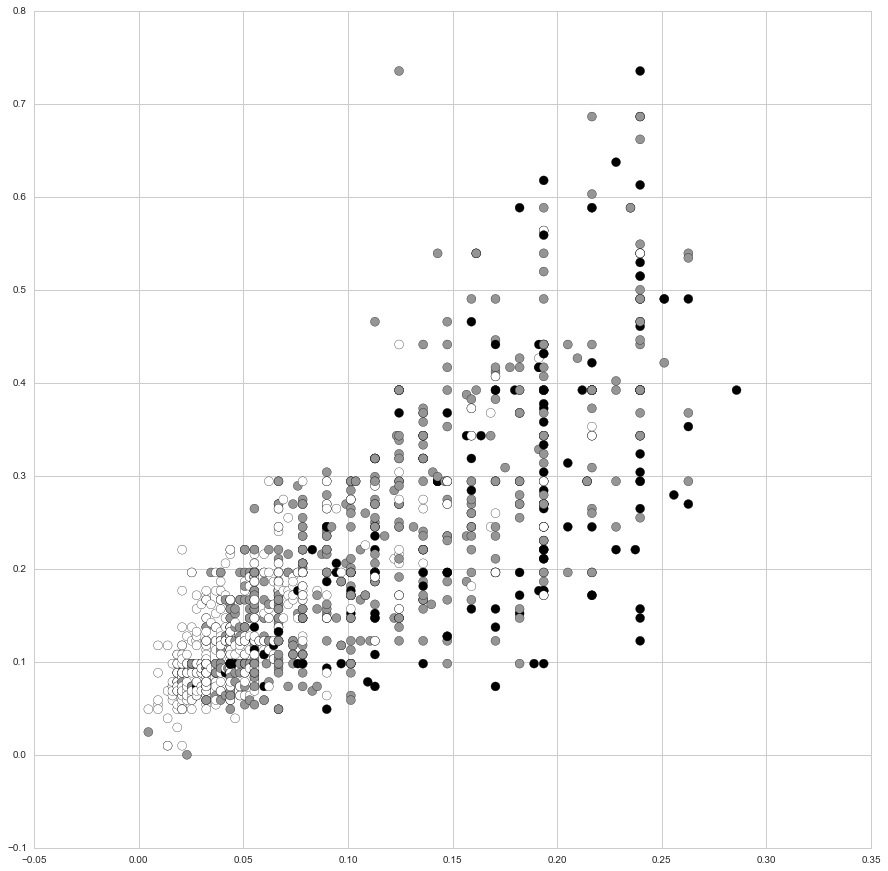

In [73]:
fig, ax = plt.subplots(figsize=(15,15))
plt.scatter(d['price'],d['square'],c=d['condition'],s=80)

0.12561336158885042

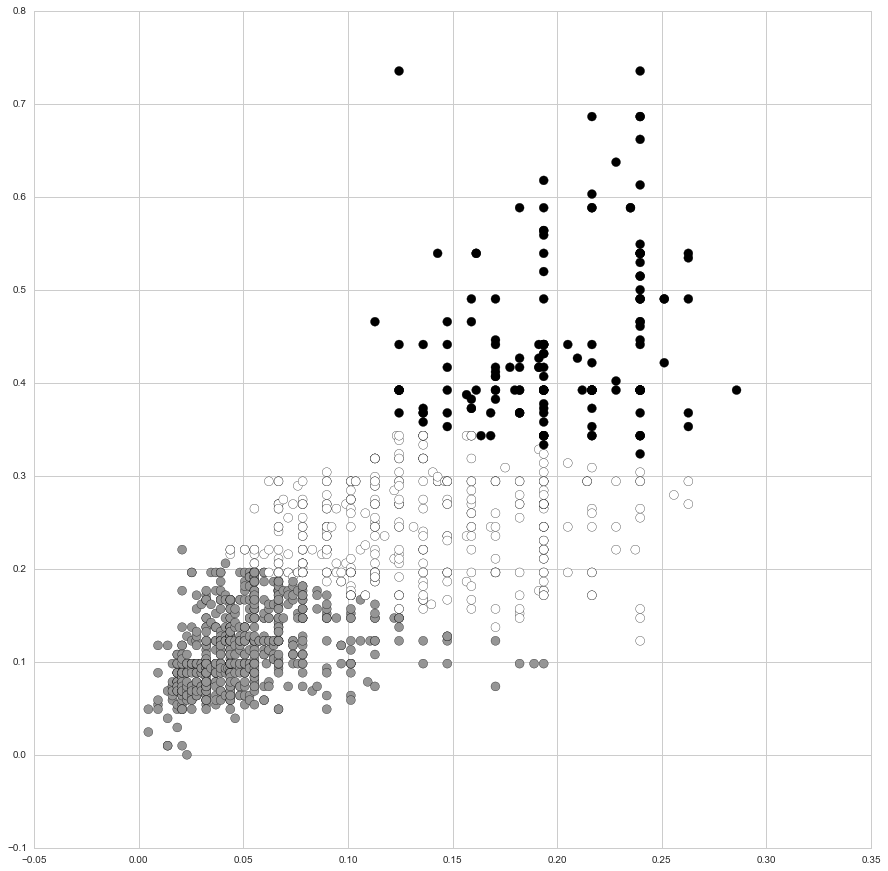

In [74]:
ig, ax = plt.subplots(figsize=(15,15))
cluster=KMeans(n_clusters=3)


y_pred=cluster.fit_predict(d[['price','square']])
plt.scatter(d['price'],d['square'],c=y_pred,s=80)
adjusted_rand_score(d['condition'], y_pred)

Очень большая ошибка.

**Вывод:** Уже из первоначальной визуализации было видно, что квартиры расположены в перемешку по типу ремонта. Проведя кластеризацию методом К-means, подтвердилось, что наши данные не могут быть разделены на подгруппы, так как ошибка очень высока. Кластеризация по типу ремонта проводилась по всем непрерывным признакам, но везде ошибка была большой.

**8)Выводы**

* В соответствие с гипотезами цена квартиры отрицательно коррелирована с расстоянием до метро и временем, которое нужно потратить, чтобы добраться до центра, и положительно коррелирована с площадью квартиры и типом ее ремонта 

* Ожидание большой корреляции цены аренды квартир с расстоянием до метро не оправдалось

* Среди всех признаков с ценой аренды квартиры наибольшую корреляцию имеет ее площадь 

* Для данной выборки проведение эффективной кластеризации оказалось невозможным из-за бинарности большинства признаков 

* В соответствие с метрикой r2 в качестве наилучшей модели был выбран RandomForestRegressor с оптимальным количеством деревьев, равным 10-20 и качеством алгоритма, равным примерно 80-85%